In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

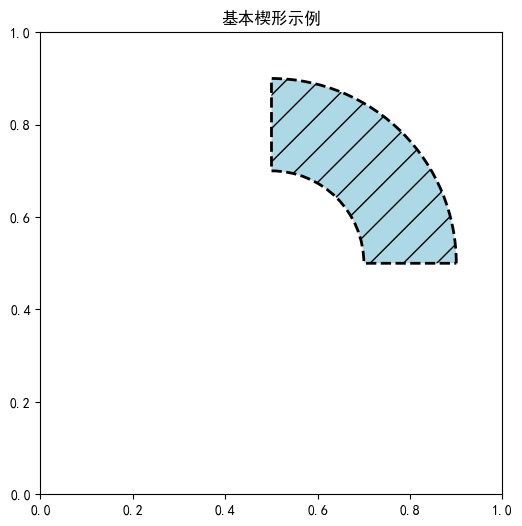

In [3]:
from matplotlib.patches import Wedge

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')  # 确保图形比例一致

# 创建一个楔形  
wedge = Wedge(center=(0.5, 0.5),               # 圆心坐标
                      r=0.4,                   # 半径
                      theta1=0,                # 起始角度（度）
                      theta2=90,               # 终止角度（度）
                      width=0.2,               # 内半径
                      facecolor='lightblue',   # 填充颜色
                      edgecolor='black',       # 边缘颜色
                      linewidth=2,             # 边缘线宽
                      linestyle='--',          # 边缘线宽
                      hatch='/'                # 填充图案 
             ) 

# 将楔形添加到坐标轴
ax.add_patch(wedge)

# 设置坐标轴范围
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('基本楔形示例')
plt.show()

# 2、使用示例：

### 示例 1：创建圆环进度条

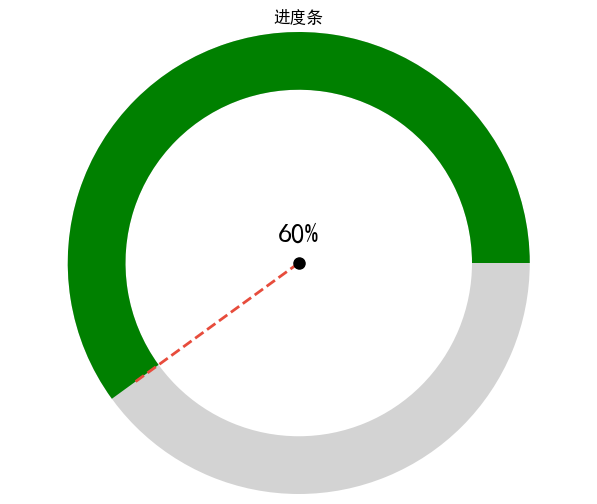

In [4]:
from matplotlib.patches import Wedge

# 进度条设计
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal')

# 背景环
bg_wedge = Wedge(center=(0.5, 0.5), r=0.4, 
                        theta1=0, theta2=360,
                        width=0.1,
                        facecolor='lightgray')

# 进度环
progress = 60
progress_angle = 360 * progress / 100
progress_wedge = Wedge(center=(0.5, 0.5), r=0.4,
                              theta1=0, theta2=progress_angle,
                              width=0.1,
                              facecolor='green')

ax.add_patch(bg_wedge)
ax.add_patch(progress_wedge)

# 添加文本
plt.text(0.5, 0.55, f'{progress}%', 
         ha='center', va='center', 
         fontsize=20, fontweight='bold')

# 添加中心圆点
ax.plot(0.5, 0.5, 'ko', markersize=8,zorder=10)

# 添加指针
# pointer_angle = 180 + (180 * progress / 100)
rad = np.deg2rad(progress_angle)
pointer_x = 0.5 + 0.35 * np.cos(rad)
pointer_y = 0.5 + 0.35 * np.sin(rad)
ax.plot([0.5, pointer_x], [0.5, pointer_y], 
        ls='--', lw=2, color='#e74c3c')


plt.xlim(0, 1)
plt.ylim(0.1, 0.9)
plt.title('进度条')
plt.axis('off')  # 隐藏坐标轴
plt.show()

### 示例 2：创建饼图

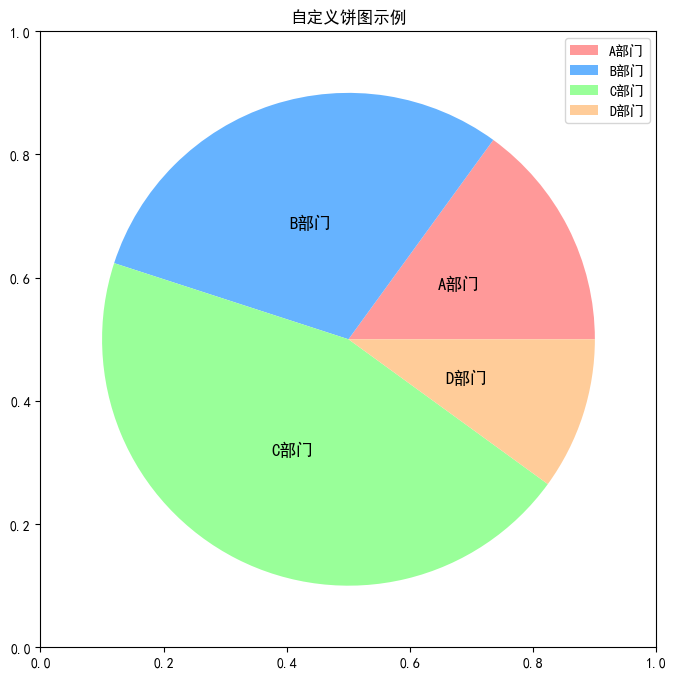

In [5]:
from matplotlib.patches import Wedge

# 模拟数据
sizes = [15, 30, 45, 10]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
labels = ['A部门', 'B部门', 'C部门', 'D部门']

fig, ax = plt.subplots(figsize=(10, 8))

start_angle = 0
for i, (size, color, label) in enumerate(zip(sizes, colors, labels)):
    # 计算结束角度
    end_angle = start_angle + size * 360 / sum(sizes)
    
    # 创建楔形
    wedge = Wedge(center=(0.5, 0.5), r=0.4,
                         theta1=start_angle, theta2=end_angle,
                         facecolor=color, label=label)
    
    # 添加楔形
    ax.add_patch(wedge)

    # 计算文字位置（楔形中间角度）
    mid_angle = (start_angle + end_angle) / 2
    mid_angle_rad = mid_angle * 3.14159 / 180  # 转换为弧度
    # 设置文字位置（稍微偏离中心）
    x = 0.5 + 0.2 * np.cos(mid_angle_rad)
    y = 0.5 + 0.2 * np.sin(mid_angle_rad)
    
    ax.text(x, y, label, ha='center', va='center', 
            fontsize=12, fontweight='bold')

    # 更新起始角度
    start_angle = end_angle

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.legend(loc='upper right')
plt.title('自定义饼图示例')
plt.show()